C:\Users\taoqi666\AppData\Local\Temp\ipykernel_15328\2664863974.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)

显示图片 08_test.tif 的预测结果


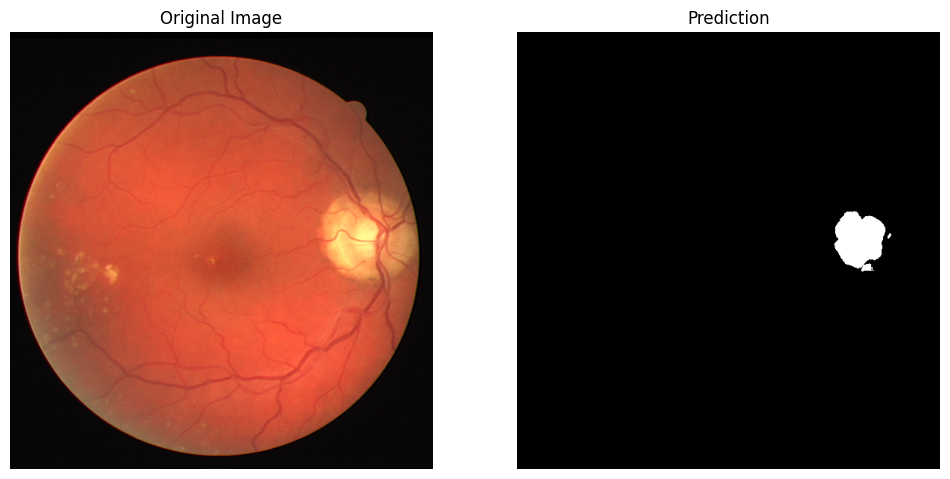

显示图片 13_test.tif 的预测结果


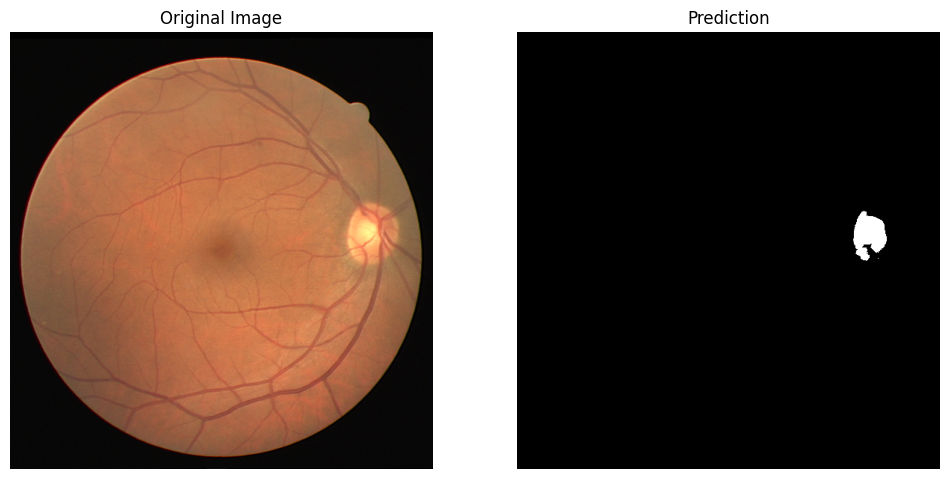

显示图片 01_test.tif 的预测结果


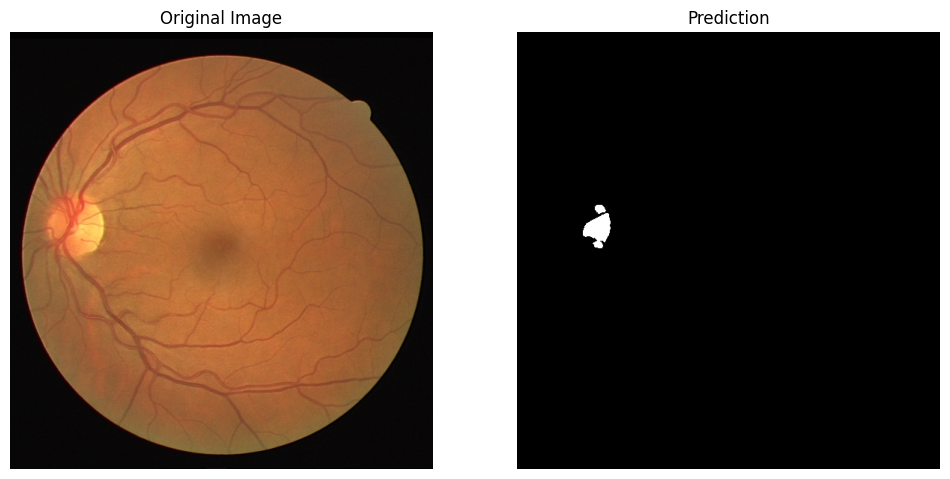

In [1]:
import sys
sys.path.append("D:\Documents\Graduate\Paper_Code\SA_Uet-pytorch")
from model.SA_Unet import SA_UNet
import os
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def load_model(model_path, device):
    """
    加载训练好的模型
    """
    model = SA_UNet()
    model.to(device)
    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint['model'])
    model.eval()  # 设置为评估模式
    return model

def preprocess_image(image_path, mean, std):
    """
    对图片进行预处理
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)  # 添加batch维度
    return image

def predict(model, image, device):
    """
    使用模型进行预测
    """
    model.eval()
    with torch.no_grad():
        image = image.to(device)
        output = model(image)
        # 假设是二分类问题，使用sigmoid函数将输出转换为概率
        output = torch.sigmoid(output)
        # 将概率转换为二值图像
        output = (output > 0.5).float()
    return output

def visualize(image_path, prediction):
    """
    使用matplotlib可视化原始图片和预测结果
    """
    # 加载原始图片
    original_image = Image.open(image_path).convert('RGB')
    original_image = np.array(original_image)

    # 将预测结果转换为numpy数组
    prediction = prediction.squeeze().cpu().numpy()  # 去掉batch维度并转到CPU
    prediction = (prediction * 255).astype(np.uint8)  # 转换为0-255范围

    # 绘制图像
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(prediction, cmap='gray')
    ax[1].set_title("Prediction")
    ax[1].axis("off")

    plt.show()

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # 加载模型
    model_path = "best_model1.pth"
    model = load_model(model_path, device)

    # 数据集的均值和标准差，需要与训练时一致
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)

    # 测试图片路径
    test_dir = "D:\Documents\Graduate\Paper_Code\SA_Uet-pytorch\DRIVE\\test\images"
    test_images = os.listdir(test_dir)
    if len(test_images) < 3:
        print("测试文件夹中图片数量不足3张")
        return

    # 随机选择3张图片
    selected_images = np.random.choice(test_images, 3, replace=False)

    for image_name in selected_images:
        image_path = os.path.join(test_dir, image_name)
        image = preprocess_image(image_path, mean, std)
        output = predict(model, image, device)
        print(f"显示图片 {image_name} 的预测结果")
        visualize(image_path, output)

if __name__ == "__main__":
    main()

In [1]:
from PIL import Image, ImageSequence
import os

def resize_gif_images(folder_path, size=(256, 256)):
    """将文件夹中的所有 GIF 图片调整为指定大小并覆盖原文件"""
    if not os.path.exists(folder_path):
        print(f"文件夹 {folder_path} 不存在")
        return

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".gif"):  # 只处理 GIF 文件
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    frames = []
                    for frame in ImageSequence.Iterator(img):  # 处理 GIF 的每一帧
                        frames.append(frame.resize(size, Image.BICUBIC))

                    # 保存 GIF，保留原始的帧速率和透明度
                    frames[0].save(file_path, save_all=True, append_images=frames[1:], loop=img.info.get("loop", 0),
                                   duration=img.info.get("duration", 100), disposal=img.info.get("disposal", 2))

                    print(f"已调整: {file_path}")
            except Exception as e:
                print(f"处理 {file_path} 时出错: {e}")

if __name__ == "__main__":
    folder ='D:\\Documents\\Graduate\\Paper_Code\\SA_Transformer\\DRIVE\\test\\mask'
    resize_gif_images(folder)


已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\01_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\02_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\03_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\04_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\05_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\06_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\07_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\08_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\09_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\10_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\DRIVE\test\mask\11_test_mask.gif
已调整: D:\Documents\Graduate\Paper_Code\SA_Transformer\D